## This program reads in streamflow data from CaMa physiology experiments at certain river locations to assess seasonal and temporal changes 
* Read in outflw at points along major global rivers

Written by Meg Fowler, 2018-05-03



In [1]:
import scipy as scipy
import scipy.stats as stats
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
import time 
import xarray as xr
import pickle 
import os

from netCDF4 import Dataset
from matplotlib import ticker
from joblib import Parallel, delayed


In [3]:
#Get dimensions from a single file (same will be used for all files)
file1 = 'outflw1161.nc'
dat   = Dataset(file1)
lat   = dat.variables['lat'][:] 
lon   = dat.variables['lon'][:] 
days  = dat.variables['time'][:]

#Read in mask of which gridcells are land vs. ocean
matData   = sio.loadmat('validGridMask_CaMa.mat')
maskVal = matData['maskVal']
#Read in CaMa gridcell areas
matData = sio.loadmat('CaMa_gridAreas.mat')
area    = matData['area']

## Can we make global maps of seasonal amplitude and its change? 
* Make monthly averages 
* Compute annual seasonal amplitude 

**NOTE: THIS SECTION WILL NOT WORK WITHOUT ACCESS TO RAW DATA. PLEASE REQUEST IF NEEDED.**
**Summary pickle file (much smaller file size) is provided instead and may be loaded, but this is not necessary for creating figures in paper.**

In [4]:
# # -- Test one year -- 
# #Define beginning of path to each file
# mainDir = '/beegfs/DATA/pritchard/mdfowler/CaMaOutput_Physiology/'
# ctrlDir = mainDir+'global_15min_physiologyControl/outflw'
# fullDir = mainDir+'global_15min_physiologyFull/outflw'
# physDir = mainDir+'global_15min_physiologyPhysiology/outflw'
# radDir  = mainDir+'global_15min_physiologyRadiation/outlfw'

# years = np.arange(1161,1191)
# i=0

# fCtrl = xr.open_dataset((ctrlDir+str(years[i])+'.nc'),decode_times=False)
# #dailyOutflwCtrl = fCtrl.outflw.values
# #np.shape(dailyOutflwCtrl)

In [10]:
# # Do one year at a time 
# years = np.arange(1161,1191)
# nlat = len(fCtrl.lat)
# nlon = len(fCtrl.lon)

# # #Define empty arrays to store monthly averages 
# # avgCtrl  = np.full([30,12,nlat,nlon],np.nan)
# # avgFull  = np.full([30,12,nlat,nlon],np.nan)
# # avgPhys  = np.full([30,12,nlat,nlon],np.nan)
# # avgRad   = np.full([30,12,nlat,nlon],np.nan)

# #Define empty arrays to store extreme flows (high/low)
# minCtrl_ann = np.full([30,nlat,nlon],np.nan)
# maxCtrl_ann = np.full([30,nlat,nlon],np.nan)
# minFull_ann = np.full([30,nlat,nlon],np.nan)
# maxFull_ann = np.full([30,nlat,nlon],np.nan)
# minPhys_ann = np.full([30,nlat,nlon],np.nan)
# maxPhys_ann = np.full([30,nlat,nlon],np.nan)
# minRad_ann  = np.full([30,nlat,nlon],np.nan)
# maxRad_ann  = np.full([30,nlat,nlon],np.nan)

# ctrl95_ann = np.full([30,nlat,nlon],np.nan) #High flow (exceeded 5% of the time each year)
# ctrl5_ann  = np.full([30,nlat,nlon],np.nan) #Low flow (exceeded 95% of the time each year)
# full95_ann = np.full([30,nlat,nlon],np.nan)
# full5_ann  = np.full([30,nlat,nlon],np.nan)
# phys95_ann = np.full([30,nlat,nlon],np.nan)
# phys5_ann  = np.full([30,nlat,nlon],np.nan)
# rad95_ann  = np.full([30,nlat,nlon],np.nan)
# rad5_ann   = np.full([30,nlat,nlon],np.nan)

# # ctrl95_allYr = np.full([nlat,nlon],np.nan) #High flow (exceeded 5% of the time over all 30 years)
# # ctrl5_allYr  = np.full([nlat,nlon],np.nan) #Low flow (exceeded 95% of the time each year)
# # full95_allYr = np.full([nlat,nlon],np.nan)
# # full5_allYr  = np.full([nlat,nlon],np.nan)
# # phys95_allYr = np.full([nlat,nlon],np.nan)
# # phys5_allYr  = np.full([nlat,nlon],np.nan)
# # rad95_allYr  = np.full([nlat,nlon],np.nan)
# # rad5_allYr   = np.full([nlat,nlon],np.nan)

# #Beginning/ending julian days for each month
# startInd = [0, 31,59, 90,120,151,181,212,243,273,304,334]
# endInd   = [30,58,89,119,150,180,211,242,272,303,333,364]

# #Define beginning of path to each file
# mainDir = '/beegfs/DATA/pritchard/mdfowler/CaMaOutput_Physiology/'
# ctrlDir = mainDir+'global_15min_physiologyControl/outflw'
# fullDir = mainDir+'global_15min_physiologyFull/outflw'
# physDir = mainDir+'global_15min_physiologyPhysiology/outflw'
# radDir  = mainDir+'global_15min_physiologyRadiation/outflw'

# print('Startin on yearly loop...')
# #Create monthly averages from yearly files 
# for i in range(len(years)):
#     t1 = time.time()
    
#     #Retrieve file via xarray 
#     fCtrl = xr.open_dataset((ctrlDir+str(years[i])+'.nc'),decode_times=False)
#     fFull = xr.open_dataset((fullDir+str(years[i])+'.nc'),decode_times=False)
#     fPhys = xr.open_dataset((physDir+str(years[i])+'.nc'),decode_times=False)
#     fRad  = xr.open_dataset((radDir+str(years[i])+'.nc'),decode_times=False)
    
#     #Read in outflow data 
#     print('Reading data...')
#     dailyOutflwCtrl = fCtrl.outflw.values
#     dailyOutflwFull = fFull.outflw.values
#     dailyOutflwPhys = fPhys.outflw.values
#     dailyOutflwRad  = fRad.outflw.values
    
# #     print('Computing monthly averages...')
# #     for iMon in range(12):
# #         #Isolate a single month of data
# #         monthCtrl = dailyOutflwCtrl[startInd[iMon]:endInd[iMon]+1,:,:]
# #         monthFull = dailyOutflwFull[startInd[iMon]:endInd[iMon]+1,:,:]
# #         monthPhys = dailyOutflwPhys[startInd[iMon]:endInd[iMon]+1,:,:]
# #         monthRad  = dailyOutflwRad[startInd[iMon]:endInd[iMon]+1,:,:]
        
# #         #Compute monthly averages 
# #         avgCtrl[i,iMon,:,:] = np.nanmean(monthCtrl,axis=0)
# #         avgFull[i,iMon,:,:] = np.nanmean(monthFull,axis=0)
# #         avgPhys[i,iMon,:,:] = np.nanmean(monthPhys,axis=0)
# #         avgRad[i,iMon,:,:]  = np.nanmean(monthRad,axis=0)
    
#     print('Getting flow extremes...')
#     minCtrl_ann[i,:,:] = np.nanmin(dailyOutflwCtrl,axis=0)
#     minFull_ann[i,:,:] = np.nanmin(dailyOutflwFull,axis=0)
#     minPhys_ann[i,:,:] = np.nanmin(dailyOutflwPhys,axis=0)
#     minRad_ann[i,:,:]  = np.nanmin(dailyOutflwRad,axis=0)
    
#     maxCtrl_ann[i,:,:] = np.nanmax(dailyOutflwCtrl,axis=0)
#     maxFull_ann[i,:,:] = np.nanmax(dailyOutflwFull,axis=0)
#     maxPhys_ann[i,:,:] = np.nanmax(dailyOutflwPhys,axis=0)
#     maxRad_ann[i,:,:]  = np.nanmax(dailyOutflwRad,axis=0)
    
#     ctrl95_ann[i,:,:]  = np.nanpercentile(dailyOutflwCtrl,95,axis=0)
#     full95_ann[i,:,:]  = np.nanpercentile(dailyOutflwFull,95,axis=0)
#     phys95_ann[i,:,:]  = np.nanpercentile(dailyOutflwPhys,95,axis=0)
#     rad95_ann[i,:,:]   = np.nanpercentile(dailyOutflwRad,95,axis=0)
    
#     ctrl5_ann[i,:,:]   = np.nanpercentile(dailyOutflwCtrl,5,axis=0)
#     full5_ann[i,:,:]   = np.nanpercentile(dailyOutflwFull,5,axis=0)
#     phys5_ann[i,:,:]   = np.nanpercentile(dailyOutflwPhys,5,axis=0)
#     rad5_ann[i,:,:]    = np.nanpercentile(dailyOutflwRad,5,axis=0)
    
#     print('Done with year ',years[i])
#     print('Time elapsed: ', time.time()-t1)
#     #Close files
#     fCtrl.close()
#     fFull.close()
#     fPhys.close()
#     fRad.close()


    
    

Startin on yearly loop...
Reading data...
Getting flow extremes...


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/pyt

Done with year  1161
Time elapsed:  577.2020726203918
Reading data...


KeyboardInterrupt: 

In [ ]:
# # Save monthly averages into a file
# fileName = '/gdata/pritchard2/mdfowler/Flooding-physiology/PythonData/MonthlyAverages.pkl'
# f_myFile = open(fileName,'wb')
# pickle.dump([avgCtrl, avgFull, avgPhys, avgRad], f_myFile)
# f_myFile.close()

**Try to do the same as above, but use parallel loops to speed it all up** 

In [5]:
# ## --- Define function to get stats on extreme flows --- ## 

# def getExtremeFlows(i):
#     t1 = time.time()
#     print('Starting on year ',i)
    
#     #Retrieve file via xarray 
#     fCtrl = xr.open_dataset((ctrlDir+str(years[i])+'.nc'),decode_times=False)
#     fFull = xr.open_dataset((fullDir+str(years[i])+'.nc'),decode_times=False)
#     fPhys = xr.open_dataset((physDir+str(years[i])+'.nc'),decode_times=False)
#     fRad  = xr.open_dataset((radDir+str(years[i])+'.nc'),decode_times=False)
    
#     #Read in outflow data 
#     print('Reading data...')
#     dailyOutflwCtrl = fCtrl.outflw.values
#     dailyOutflwFull = fFull.outflw.values
#     dailyOutflwPhys = fPhys.outflw.values
#     dailyOutflwRad  = fRad.outflw.values
    
#     print('Getting flow extremes...')
#     minCtrl_ann = np.nanmin(dailyOutflwCtrl,axis=0)
#     minFull_ann = np.nanmin(dailyOutflwFull,axis=0)
#     minPhys_ann = np.nanmin(dailyOutflwPhys,axis=0)
#     minRad_ann  = np.nanmin(dailyOutflwRad,axis=0)
    
#     maxCtrl_ann = np.nanmax(dailyOutflwCtrl,axis=0)
#     maxFull_ann = np.nanmax(dailyOutflwFull,axis=0)
#     maxPhys_ann = np.nanmax(dailyOutflwPhys,axis=0)
#     maxRad_ann  = np.nanmax(dailyOutflwRad,axis=0)
    
#     ctrl95_ann = np.nanpercentile(dailyOutflwCtrl,95,axis=0)
#     full95_ann  = np.nanpercentile(dailyOutflwFull,95,axis=0)
#     phys95_ann  = np.nanpercentile(dailyOutflwPhys,95,axis=0)
#     rad95_ann   = np.nanpercentile(dailyOutflwRad,95,axis=0)
    
#     ctrl5_ann  = np.nanpercentile(dailyOutflwCtrl,5,axis=0)
#     full5_ann   = np.nanpercentile(dailyOutflwFull,5,axis=0)
#     phys5_ann   = np.nanpercentile(dailyOutflwPhys,5,axis=0)
#     rad5_ann    = np.nanpercentile(dailyOutflwRad,5,axis=0)
    
#     print('Done with year ',years[i])
#     print('Time elapsed: ', time.time()-t1)
#     #Close files
#     fCtrl.close()
#     fFull.close()
#     fPhys.close()
#     fRad.close()
    
#     return minCtrl_ann,minFull_ann,minPhys_ann,minRad_ann,maxCtrl_ann,maxFull_ann,maxPhys_ann,maxRad_ann,ctrl95_ann,full95_ann,phys95_ann,rad95_ann,ctrl5_ann,full5_ann,phys5_ann,rad5_ann

#     #return minCtrl_ann,minFull_ann,minPhys_ann,minRad_ann



In [6]:
# # Do one year at a time 
# years = np.arange(1161,1191)
# nlat = len(fCtrl.lat)
# nlon = len(fCtrl.lon)

# #Define empty arrays to store extreme flows (high/low)
# minCtrl_ann = np.full([30,nlat,nlon],np.nan)
# maxCtrl_ann = np.full([30,nlat,nlon],np.nan)
# minFull_ann = np.full([30,nlat,nlon],np.nan)
# maxFull_ann = np.full([30,nlat,nlon],np.nan)
# minPhys_ann = np.full([30,nlat,nlon],np.nan)
# maxPhys_ann = np.full([30,nlat,nlon],np.nan)
# minRad_ann  = np.full([30,nlat,nlon],np.nan)
# maxRad_ann  = np.full([30,nlat,nlon],np.nan)

# ctrl95_ann = np.full([30,nlat,nlon],np.nan) #High flow (exceeded 5% of the time each year)
# ctrl5_ann  = np.full([30,nlat,nlon],np.nan) #Low flow (exceeded 95% of the time each year)
# full95_ann = np.full([30,nlat,nlon],np.nan)
# full5_ann  = np.full([30,nlat,nlon],np.nan)
# phys95_ann = np.full([30,nlat,nlon],np.nan)
# phys5_ann  = np.full([30,nlat,nlon],np.nan)
# rad95_ann  = np.full([30,nlat,nlon],np.nan)
# rad5_ann   = np.full([30,nlat,nlon],np.nan)

# #Define beginning of path to each file
# mainDir = '/beegfs/DATA/pritchard/mdfowler/CaMaOutput_Physiology/'
# ctrlDir = mainDir+'global_15min_physiologyControl/outflw'
# fullDir = mainDir+'global_15min_physiologyFull/outflw'
# physDir = mainDir+'global_15min_physiologyPhysiology/outflw'
# radDir  = mainDir+'global_15min_physiologyRadiation/outflw'

# print('Starting on parallel...')
# bigArr = Parallel(n_jobs=5)(delayed(getExtremeFlows)(i) for i in range(int(len(years))))

# for i in range(len(bigArr)):
#     minCtrl_ann[i,:,:] = bigArr[i][0][:][:]
#     minFull_ann[i,:,:] = bigArr[i][1][:][:]
#     minPhys_ann[i,:,:] = bigArr[i][2][:][:]
#     minRad_ann[i,:,:]  = bigArr[i][3][:][:]
#     maxCtrl_ann[i,:,:] = bigArr[i][4][:][:]
#     maxFull_ann[i,:,:] = bigArr[i][5][:][:]
#     maxPhys_ann[i,:,:] = bigArr[i][6][:][:]
#     maxRad_ann[i,:,:]  = bigArr[i][7][:][:]
#     ctrl95_ann[i,:,:]  = bigArr[i][8][:][:]
#     full95_ann[i,:,:]  = bigArr[i][9][:][:]
#     phys95_ann[i,:,:]  = bigArr[i][10][:][:]
#     rad95_ann[i,:,:]   = bigArr[i][11][:][:]
#     ctrl5_ann[i,:,:]   = bigArr[i][12][:][:]
#     full5_ann[i,:,:]   = bigArr[i][13][:][:]
#     phys5_ann[i,:,:]   = bigArr[i][14][:][:]
#     rad5_ann[i,:,:]    = bigArr[i][15][:][:]


Starting on parallel...
Starting on year  4
Starting on year  0
Starting on year  2
Starting on year  3
Starting on year  1
Reading data...
Reading data...
Reading data...
Reading data...
Reading data...
Getting flow extremes...


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/pyt

Getting flow extremes...


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN slice encountered


Getting flow extremes...


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/pyt

Getting flow extremes...


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1172: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN slice enco

Getting flow extremes...


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: All-NaN slice encountered
/home/mdfowler/anaconda3/lib/pyt

Done with year  1162
Time elapsed:  876.201682806015
Starting on year  5
Reading data...
Done with year  1163
Time elapsed:  879.124050617218
Starting on year  6
Done with year  1161
Time elapsed:  880.6000020503998
Reading data...
Starting on year  7
Reading data...
Done with year  1165
Time elapsed:  890.3130404949188
Starting on year  8
Reading data...
Done with year  1164
Time elapsed:  892.7900705337524
Starting on year  9
Reading data...
Getting flow extremes...
Getting flow extremes...
Getting flow extremes...
Getting flow extremes...
Getting flow extremes...
Done with year  1166
Time elapsed:  1314.8006520271301
Starting on year  10
Reading data...
Done with year  1167
Time elapsed:  1334.9496426582336
Starting on year  11
Reading data...
Done with year  1169
Time elapsed:  1328.4580731391907
Starting on year  12
Reading data...
Done with year  1168
Time elapsed:  1350.1268939971924
Starting on year  13
Reading data...
Done with year  1170
Time elapsed:  1361.1857101917267
Star

In [7]:
# # Save monthly averages into a file
# fileName = '/gdata/pritchard2/mdfowler/Flooding-physiology/PythonData/StreamflowAnnualExtremes.pkl'
# f_myFile = open(fileName,'wb')
# pickle.dump([minCtrl_ann, minFull_ann, minPhys_ann, minRad_ann,maxCtrl_ann,maxFull_ann,maxPhys_ann,maxRad_ann,
#             ctrl95_ann,full95_ann,phys95_ann,rad95_ann,ctrl5_ann,full5_ann,phys5_ann,rad5_ann], f_myFile)
# f_myFile.close()

In [84]:
# # Save monthly averages into a file
# fileName = '/gdata/pritchard2/mdfowler/Flooding-physiology/PythonData/MonthlyAverages.pkl'
# f_myFile = open(fileName,'wb')
# pickle.dump([avgCtrl, avgFull, avgPhys, avgRad], f_myFile)
# f_myFile.close()

In [6]:
# Load monthly averages from file
[avgCtrl,avgFull,avgPhys,avgRad]=np.load('MonthlyAverages.pkl')


OSError: Failed to interpret file '/Users/meganfowler/gp_fuse/Flooding-physiology/PythonData/MonthlyAverages.pkl' as a pickle

## What does the change in percentiles of peak and low flow look like?

In [9]:
## Read in daily streamflow data from CaMa ##
import xarray as xr

#Read indices for subsetted data 
lonFile = open("lonIndices_subsetKey.txt","r")
latFile = open("latIndices_subsetKey.txt","r")

lonSubset=[]
for line in lonFile.readlines():
    lonSubset.append(float(line))  

latSubset=[]
for line in latFile.readlines():
    latSubset.append(float(line))

#Set filepaths for daily data
ctrlFile = 'Control_outflow_subset.nc'
fullFile = 'Full_outflow_subset.nc'
physFile = 'Physiology_outflow_subset.nc'
radFile  = 'Radiation_outflow_subset.nc'

#Read in outflow data  
fCtrl = xr.open_dataset(ctrlFile,decode_times=False)
fFull = xr.open_dataset(fullFile,decode_times=False)
fPhys = xr.open_dataset(physFile,decode_times=False)
fRad  = xr.open_dataset(radFile,decode_times=False)

outflwCtrl = fCtrl.outflow
outflwFull = fFull.outflow
outflwPhys = fPhys.outflow
outflwRad  = fRad.outflow


In [9]:
outflwCtrl.values[0,:]

array([978.964  , 974.5963 , 970.378  , ..., 749.03   , 746.4944 ,
       743.99506], dtype=float32)

In [10]:
# -- Find the highest percentile flows for all 30 years at each location -- #
pct95_ctrl  = np.full([len(outflwCtrl)],np.nan)    #Define empty arrays to store data 
pct99_ctrl  = np.full([len(outflwCtrl)],np.nan)
pct999_ctrl = np.full([len(outflwCtrl)],np.nan)

# pct95_full  = np.full([len(outflwCtrl)],np.nan)
# pct99_full  = np.full([len(outflwCtrl)],np.nan)
# pct999_full = np.full([len(outflwCtrl)],np.nan)

# pct95_phys  = np.full([len(outflwCtrl)],np.nan)
# pct99_phys  = np.full([len(outflwCtrl)],np.nan)
# pct999_phys = np.full([len(outflwCtrl)],np.nan)

# pct95_rad  = np.full([len(outflwCtrl)],np.nan)
# pct99_rad  = np.full([len(outflwCtrl)],np.nan)
# pct999_rad = np.full([len(outflwCtrl)],np.nan)

for iloc in range(len(outflwCtrl)):
    pct95_ctrl[iloc]  = np.nanpercentile(outflwCtrl.values[iloc,:],95,axis=0)
    pct99_ctrl[iloc]  = np.nanpercentile(outflwCtrl.values[iloc,:],99,axis=0)
    pct999_ctrl[iloc] = np.nanpercentile(outflwCtrl.values[iloc,:],99.9,axis=0)
   #      pct95_full[iloc]  = np.nanpercentile(outflwFull.values[iloc,:],95,axis=0)
#     pct99_full[iloc]  = np.nanpercentile(outflwFull.values[iloc,:],99,axis=0)
#     pct999_full[iloc] = np.nanpercentile(outflwFull.values[iloc,:],99.9,axis=0)
    
#     pct95_phys[iloc]  = np.nanpercentile(outflwPhys.values[iloc,:],95,axis=0)
#     pct99_phys[iloc]  = np.nanpercentile(outflwPhys.values[iloc,:],99,axis=0)
#     pct999_phys[iloc] = np.nanpercentile(outflwPhys.values[iloc,:],99.9,axis=0)
    
#     pct95_rad[iloc]  = np.nanpercentile(outflwRad.values[iloc,:],95,axis=0)
#     pct99_rad[iloc]  = np.nanpercentile(outflwRad.values[iloc,:],99,axis=0)
#     pct999_rad[iloc] = np.nanpercentile(outflwRad.values[iloc,:],99.9,axis=0)
    
#     if np.mod(iloc,100)==0:
#         print('Done with location ',iloc,'of ',len(outflwCtrl))
    

Done with location  0 of  10676
Done with location  100 of  10676
Done with location  200 of  10676
Done with location  300 of  10676
Done with location  400 of  10676
Done with location  500 of  10676
Done with location  600 of  10676
Done with location  700 of  10676
Done with location  800 of  10676
Done with location  900 of  10676
Done with location  1000 of  10676
Done with location  1100 of  10676
Done with location  1200 of  10676
Done with location  1300 of  10676
Done with location  1400 of  10676
Done with location  1500 of  10676
Done with location  1600 of  10676
Done with location  1700 of  10676
Done with location  1800 of  10676
Done with location  1900 of  10676
Done with location  2000 of  10676
Done with location  2100 of  10676
Done with location  2200 of  10676
Done with location  2300 of  10676
Done with location  2400 of  10676
Done with location  2500 of  10676
Done with location  2600 of  10676
Done with location  2700 of  10676
Done with location  2800 of  106

**Fill in global arrays**

In [14]:
#Define empty arrays 
global95Ctrl = np.full([len(lat),len(lon)],np.nan)
global99Ctrl = np.full([len(lat),len(lon)],np.nan)
global999Ctrl = np.full([len(lat),len(lon)],np.nan)

global95Full = np.full([len(lat),len(lon)],np.nan)
global99Full = np.full([len(lat),len(lon)],np.nan)
global999Full = np.full([len(lat),len(lon)],np.nan)

global95Phys = np.full([len(lat),len(lon)],np.nan)
global99Phys = np.full([len(lat),len(lon)],np.nan)
global999Phys = np.full([len(lat),len(lon)],np.nan)

global95Rad  = np.full([len(lat),len(lon)],np.nan)
global99Rad  = np.full([len(lat),len(lon)],np.nan)
global999Rad  = np.full([len(lat),len(lon)],np.nan)

#Fill in river network 
for inp in range(len(lonSubset)):
    ilon = int(lonSubset[inp])
    ilat = int(latSubset[inp])
    
    global95Ctrl[ilat,ilon]  = pct95_ctrl[inp]
    global99Ctrl[ilat,ilon]  = pct99_ctrl[inp]
    global999Ctrl[ilat,ilon] = pct999_ctrl[inp]
    
    global95Full[ilat,ilon]  = pct95_full[inp]
    global99Full[ilat,ilon]  = pct99_full[inp]
    global999Full[ilat,ilon] = pct999_full[inp]
    
    global95Phys[ilat,ilon]  = pct95_phys[inp]
    global99Phys[ilat,ilon]  = pct99_phys[inp]
    global999Phys[ilat,ilon] = pct999_phys[inp]
    
    global95Rad[ilat,ilon]   = pct95_rad[inp]
    global99Rad[ilat,ilon]   = pct99_rad[inp]
    global999Rad[ilat,ilon]   = pct999_rad[inp]


In [15]:
#Find differences in variance under FULL/PHYS/RAD 
diff95_full  = global95Full  - global95Ctrl
diff99_full  = global99Full  - global99Ctrl
diff999_full = global999Full - global999Ctrl

diff95_phys  = global95Phys  - global95Ctrl
diff99_phys  = global99Phys  - global99Ctrl
diff999_phys = global999Phys - global999Ctrl

diff95_rad   = global95Rad  - global95Ctrl 
diff99_rad   = global99Rad  - global99Ctrl 
diff999_rad  = global999Rad  - global999Ctrl 

#Find percent differences 
pctDiff95_full  = (diff95_full/global95Ctrl)*100
pctDiff99_full  = (diff99_full/global99Ctrl)*100
pctDiff999_full = (diff999_full/global999Ctrl)*100

pctDiff95_phys  = (diff95_phys/global95Ctrl)*100
pctDiff99_phys  = (diff99_phys/global99Ctrl)*100
pctDiff999_phys = (diff999_phys/global999Ctrl)*100

pctDiff95_rad  = (diff95_rad/global95Ctrl)*100
pctDiff99_rad  = (diff99_rad/global99Ctrl)*100
pctDiff999_rad = (diff999_rad/global999Ctrl)*100



In [16]:
# Save monthly averages into a file
fileName = 'StreamflowExtremePcts_30yrs.pkl'
f_myFile = open(fileName,'wb')
pickle.dump([pctDiff95_full,pctDiff99_full,pctDiff999_full,pctDiff95_phys,
             pctDiff99_phys,pctDiff999_phys,pctDiff95_rad,pctDiff99_rad,pctDiff999_rad,
            global95Ctrl,global99Ctrl,global999Ctrl], f_myFile)
f_myFile.close()



**The above has been modified to find varying levels of peak flows, but the same approach is used for finding the 5th percentile, saved as StreamflowAnnualExtremes.pkl (but these steps were removed in process of updating for more extremes here)**


## Make mask of which locations to keep daily data for 


In [8]:
#[avgCtrl,avgFull,avgPhys,avgRad]=np.load('/gdata/pritchard2/mdfowler/Flooding-physiology/PythonData/MonthlyAverages.pkl')

yrAvgCtrl = np.nanmean(avgCtrl,axis=0)
yrAvgCtrl = np.nanmean(yrAvgCtrl,axis=0)
np.shape(yrAvgCtrl)

np.nanmean(np.nanmean(yrAvgCtrl))

/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


204.37257504391684

/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


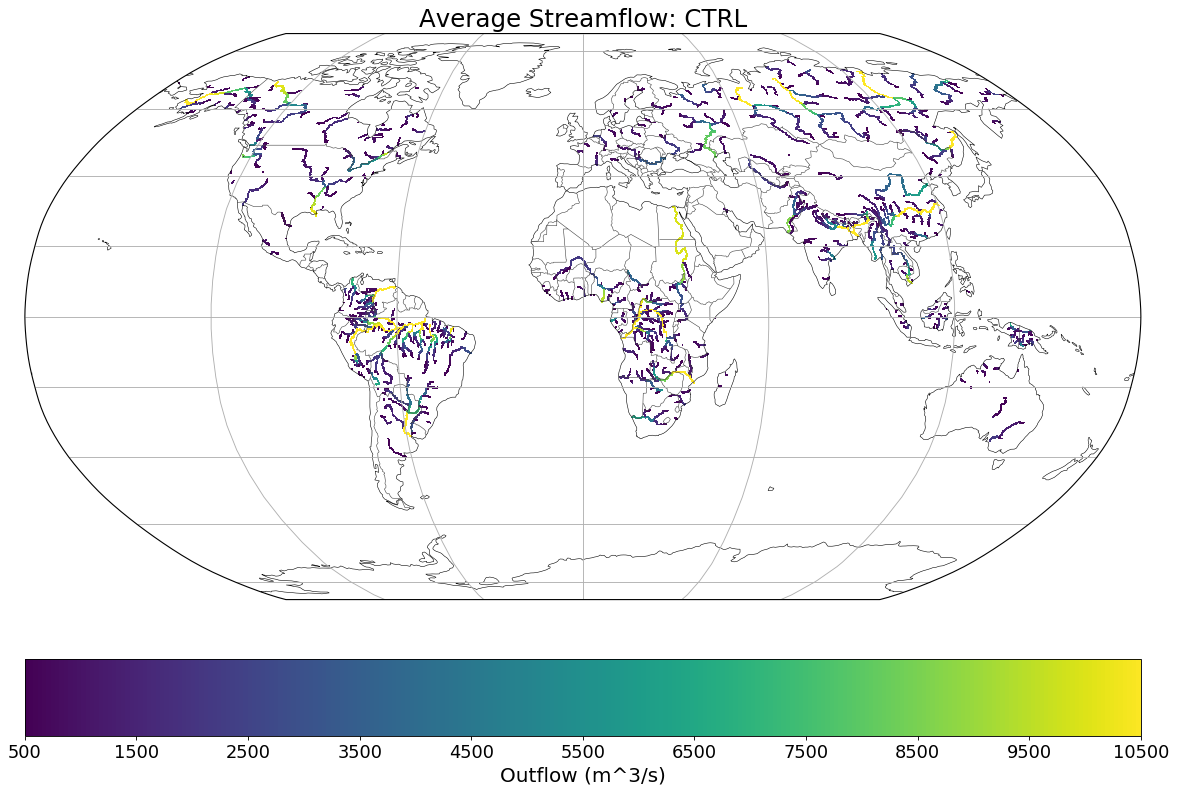

In [20]:
# ---- PLOT AVERAGE STREAMFLOW ---- # 
yrAvgCtrl = np.nanmean(avgCtrl,axis=0)
yrAvgCtrl = np.nanmean(yrAvgCtrl,axis=0)

cutoff = 500 #Threshold for minimum streamflow

#Blank places where seasonal amplitude is below threshold to pick out larger rivers on map
yrAvgCtrl_New = yrAvgCtrl
yrAvgCtrl_New[np.where(yrAvgCtrl<=cutoff)] = np.nan

#Define figure 
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()
bounds = np.arange(cutoff,10500+1)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

## --- Create Plot ---
contour_plot = ax.pcolormesh(lon,lat,yrAvgCtrl_New,cmap='viridis',norm=norm,vmin=cutoff,vmax=10500,transform=ccrs.PlateCarree())
#Colorbar 
ax_position = ax.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0+0.05, ax_position.width, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label('Outflow (m^3/s)',fontsize=18)
cbar.ax.tick_params(labelsize=16)
tick_locator = ticker.LinearLocator(numticks=11)
cbar.locator = tick_locator
cbar.update_ticks()
#Other figure options 
ax.set_title('Average Streamflow: CTRL')
ax.title.set_fontsize(22)
ax.coastlines(linewidth=0.5,edgecolor='0.25')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

plt.show() 

#Save figure
#fig.savefig('/gdata/pritchard2/mdfowler/Flooding-physiology/PythonFigs/SeasonalAmplitude_CTRL.jpg',bbox_inches = 'tight')  #Save figure as jpg



In [15]:
# Create river network mask at CaMa resolution 

lonMask = []
latMask = []

for i in range(len(lat)):
    for j in range(len(lon)):
        if np.isnan(yrAvgCtrl_New[i,j])==False:
            lonMask = np.append(lonMask, j)
            latMask = np.append(latMask, i)

lonMask = lonMask.astype(int)
latMask = latMask.astype(int)


In [56]:
# Save lat/lon into a file
fileName = '/gdata/pritchard2/mdfowler/Flooding-physiology/PythonData/RiverCoordinates_outflow>500.pkl'
f_myFile = open(fileName,'wb')
pickle.dump([lonMask, latMask], f_myFile)
f_myFile.close()

In [35]:
[avgCtrl,avgFull,avgPhys,avgRad]=np.load('/gdata/pritchard2/mdfowler/Flooding-physiology/PythonData/MonthlyAverages.pkl')

yrAvgCtrl = np.nanmean(avgCtrl,axis=0)
yrAvgCtrl = np.nanmean(yrAvgCtrl,axis=0)

print(np.shape(yrAvgCtrl))



(720, 1440)


/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mdfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [40]:

isel=1

print(yrAvgCtrl[latMask[isel],lonMask[isel]])

print(latMask[isel])
print(lonMask[isel])


1016.2649495442707
56
1117


In [6]:
# Read in selected point of raw data
ctrlRegOutflw = fCtrl_outflw.isel(lat=slice(56,56+1), lon=slice(1117,1117+1))

ctrlVals = ctrlRegOutflw.outflw.values

In [8]:
np.shape(ctrlVals)
print(np.nanmean(ctrlVals,axis=0))

[[1018.3025]]
